In [ ]:
!nvidia-smi
!pip install wandb -qq

!pip install ultralytics==8.0.196 roboflow
!pip install --upgrade ultralytics

!pip install -U albumentations
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 opencv-python==4.8.0.76 -q --user

Wed Oct 30 09:12:00 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   30C    P0              43W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [ ]:

import os
import numpy as np                                                                                
import pandas as pd                                                                           
import matplotlib.pyplot as plt                                                                 
import math                                                                                     
import cv2                                                                                       
import seaborn as sns                                                                          


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                             
from tensorflow.keras.models import Sequential                                                  
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam,SGD                                              
from tensorflow.keras import backend
from tensorflow.keras.models import Model
from keras.callbacks import ReduceLROnPlateau
from keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Input

from sklearn import preprocessing                                                                
from sklearn.model_selection import train_test_split                                             
from sklearn.metrics import confusion_matrix                                                     
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer


# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                   
import random

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
from ultralytics import YOLO

import numpy as np
from roboflow import Roboflow

from IPython.display import display, Image

import zipfile
np.random.seed(27)
random.seed(27)
tf.random.set_seed(27)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Define the location of the zip file in Google Drive
zip_file_path = '/content/drive/MyDrive/Q3_yolov5/train.zip'

# Specify the extraction path to be DP_Q3
extract_folder_path = os.path.dirname(zip_file_path)

# Unzip the file to the DP_Q3 folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder_path)

print(f"Unzipped to: {extract_folder_path}")

Unzipped to: /content/drive/MyDrive/Q3_yolov5


In [ ]:
# Define the location of the zip file in Google Drive
zip_file_path = '/content/drive/MyDrive/Q3_yolov5/test.zip'

# Specify the extraction path to be DP_Q3
extract_folder_path = os.path.dirname(zip_file_path)

# Unzip the file to the DP_Q3 folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder_path)

print(f"Unzipped to: {extract_folder_path}")

Unzipped to: /content/drive/MyDrive/Q3_yolov5


In [ ]:
# Define the location of the zip file in Google Drive
zip_file_path = '/content/drive/MyDrive/Q3_yolov5/valid.zip'

# Specify the extraction path to be DP_Q3
extract_folder_path = os.path.dirname(zip_file_path)

# Unzip the file to the DP_Q3 folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder_path)

print(f"Unzipped to: {extract_folder_path}")

Unzipped to: /content/drive/MyDrive/Q3_yolov5


In [ ]:
data_yaml_path = r'/content/drive/MyDrive/Q3_yolov5/data_aug.yaml'

In [ ]:
from ultralytics import YOLO
model = YOLO('yolov5x.pt')  # Loading the pretrained model for yolov5x

PRO TIP 💡 Replace 'model=yolov5x.pt' with new 'model=yolov5xu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 186M/186M [00:05<00:00, 38.9MB/s]


In [ ]:
# Training the model
results = model.train(data=data_yaml_path, epochs=27, lr0=0.001, batch=8, flipud=0.3, fliplr= 0.1, pretrained=True, optimizer='AdamW', imgsz=640, dropout=0.1, mosaic= 0.5, classes = [0, 9, 14, 15], cache=False) #train the model with data.yaml

Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov5x.pt, data=/content/drive/MyDrive/Q3_yolov5/data_aug.yaml, epochs=27, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.1, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=[0, 9, 14, 15], retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, s

100%|██████████| 755k/755k [00:00<00:00, 13.6MB/s]


Overriding model.yaml nc=80 with nc=25

                   from  n    params  module                                       arguments                     
  0                  -1  1      8800  ultralytics.nn.modules.conv.Conv             [3, 80, 6, 2, 2]              
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  4    309120  ultralytics.nn.modules.block.C3              [160, 160, 4]                 
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  8   2259200  ultralytics.nn.modules.block.C3              [320, 320, 8]                 
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1 12  13125120  ultralytics.nn.modules.block.C3              [640, 640, 12]                
  7                  -1  1   7375360  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 63.5MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Q3_yolov5/train/labels... 5594 images, 13 backgrounds, 0 corrupt: 100%|██████████| 5594/5594 [01:21<00:00, 68.53it/s] 


train: New cache created: /content/drive/MyDrive/Q3_yolov5/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/Q3_yolov5/valid/labels... 641 images, 1 backgrounds, 0 corrupt: 100%|██████████| 641/641 [00:04<00:00, 130.48it/s]


val: New cache created: /content/drive/MyDrive/Q3_yolov5/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 135 weight(decay=0.0), 142 weight(decay=0.0005), 141 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 27 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/27      9.26G      1.471      3.758      1.932          1        640: 100%|██████████| 700/700 [02:02<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:05<00:00,  7.08it/s]


                   all        641        139      0.107       0.16      0.113     0.0623

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/27      8.98G      1.413      3.208        1.9          0        640: 100%|██████████| 700/700 [01:51<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  9.69it/s]

                   all        641        139      0.223      0.317      0.182      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/27      8.97G      1.323       2.93      1.789          0        640: 100%|██████████| 700/700 [01:48<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00, 10.01it/s]

                   all        641        139       0.27      0.389      0.289        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/27      8.97G      1.268      2.814       1.74          0        640: 100%|██████████| 700/700 [01:47<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  9.95it/s]

                   all        641        139      0.352       0.48      0.442      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/27      8.59G      1.178      2.445      1.664          0        640: 100%|██████████| 700/700 [01:47<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  9.73it/s]

                   all        641        139      0.417        0.5      0.498      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/27      8.98G      1.126      2.388      1.601          0        640: 100%|██████████| 700/700 [01:47<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00, 10.08it/s]

                   all        641        139       0.42      0.571      0.512       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/27       8.6G      1.102      2.211      1.585          1        640: 100%|██████████| 700/700 [01:47<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  9.73it/s]

                   all        641        139      0.514      0.725      0.534      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/27      8.98G      1.053      2.043      1.544          1        640: 100%|██████████| 700/700 [01:47<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  9.81it/s]

                   all        641        139      0.639      0.503      0.546      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/27      8.58G      1.039       1.97      1.522          2        640: 100%|██████████| 700/700 [01:47<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00, 10.04it/s]

                   all        641        139      0.693      0.656      0.613      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/27      8.98G     0.9848      1.891      1.473          0        640: 100%|██████████| 700/700 [01:47<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00, 10.11it/s]

                   all        641        139      0.545      0.689      0.635      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/27      8.59G     0.9831        1.8      1.469          1        640: 100%|██████████| 700/700 [01:47<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00, 10.06it/s]

                   all        641        139      0.514      0.653      0.626      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/27      8.97G     0.9469      1.749      1.425          2        640: 100%|██████████| 700/700 [01:47<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00, 10.00it/s]

                   all        641        139      0.594      0.681      0.674      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/27      8.57G     0.9161      1.624      1.413          1        640: 100%|██████████| 700/700 [01:47<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  9.86it/s]

                   all        641        139      0.516      0.727      0.572      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/27      8.98G     0.9424      1.597       1.43          0        640: 100%|██████████| 700/700 [01:46<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00, 10.10it/s]

                   all        641        139      0.568      0.653      0.646      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/27      8.59G     0.9216      1.515      1.407          2        640: 100%|██████████| 700/700 [01:47<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  9.88it/s]

                   all        641        139      0.845      0.709      0.794      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/27      8.97G     0.8958      1.476      1.386          1        640: 100%|██████████| 700/700 [01:47<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00, 10.19it/s]

                   all        641        139      0.692      0.732      0.797      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/27      8.58G     0.8479      1.394      1.337          3        640: 100%|██████████| 700/700 [01:47<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00, 10.06it/s]

                   all        641        139      0.887      0.686      0.807      0.651


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/27      8.97G      0.689      1.012       1.26          1        640: 100%|██████████| 700/700 [01:49<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00, 10.17it/s]

                   all        641        139      0.933      0.764      0.886      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/27      8.59G     0.6366     0.9462      1.175          1        640: 100%|██████████| 700/700 [01:46<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.36it/s]

                   all        641        139      0.918      0.744      0.862        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/27      8.96G     0.6529     0.9218      1.208          1        640: 100%|██████████| 700/700 [01:46<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00, 10.09it/s]

                   all        641        139      0.911      0.797      0.865      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/27      8.59G     0.6511     0.8611      1.219          0        640: 100%|██████████| 700/700 [01:46<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00, 10.03it/s]

                   all        641        139      0.845        0.8      0.893      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/27      8.98G     0.6144     0.7605      1.187          1        640: 100%|██████████| 700/700 [01:46<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.36it/s]

                   all        641        139      0.914      0.803      0.901      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/27       8.6G     0.6097     0.7931      1.171          2        640: 100%|██████████| 700/700 [01:46<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00, 10.16it/s]

                   all        641        139      0.911      0.833      0.876      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/27      8.97G      0.584     0.7494       1.16          0        640: 100%|██████████| 700/700 [01:46<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00, 10.17it/s]

                   all        641        139      0.941      0.808      0.899      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/27       8.6G     0.5632     0.6765      1.138          0        640: 100%|██████████| 700/700 [01:46<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.57it/s]

                   all        641        139       0.93      0.835      0.923      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/27      8.98G      0.586     0.6789      1.158          1        640: 100%|██████████| 700/700 [01:47<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.35it/s]

                   all        641        139      0.935      0.843      0.929      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/27      8.56G      0.556     0.6605      1.119          1        640: 100%|██████████| 700/700 [01:46<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.50it/s]

                   all        641        139      0.937      0.839      0.925      0.764



27 epochs completed in 0.867 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 195.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 195.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLOv5x summary (fused): 358 layers, 97,176,683 parameters, 0 gradients, 246.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  9.95it/s]


                   all        641        139      0.935      0.843      0.929      0.766
-Road narrows on right         15         15          1      0.841      0.967      0.815
          One way road         27         27      0.965      0.815      0.914      0.781
    Speed limit 20 Kph         40         42      0.835      0.857      0.895      0.703
    Speed limit 30 Kph         48         55       0.94      0.859      0.939      0.766
Speed: 0.1ms preprocess, 4.2ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train


In [ ]:
model = YOLO("/content/runs/detect/train/weights/best.pt")

# Training the model
results = model.train(data=data_yaml_path, lr0=0.001, epochs=45, batch=8, imgsz=640, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, pretrained=True, optimizer='AdamW', dropout=0.1, shear=0.0, scale=0.3, perspective=0.0, classes = [0, 8, 9, 14, 15], cache=False) #train the model with data.yaml

Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=/content/runs/detect/train/weights/best.pt, data=/content/drive/MyDrive/Q3_yolov5/data_aug.yaml, epochs=45, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.1, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=[0, 8, 9, 14, 15], retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False,

train: Scanning /content/drive/MyDrive/Q3_yolov5/train/labels.cache... 5594 images, 13 backgrounds, 0 corrupt: 100%|██████████| 5594/5594 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/Q3_yolov5/valid/labels.cache... 641 images, 1 backgrounds, 0 corrupt: 100%|██████████| 641/641 [00:00<?, ?it/s]


Plotting labels to runs/detect/train6/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 135 weight(decay=0.0), 142 weight(decay=0.0005), 141 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train6
Starting training for 45 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/45      9.87G     0.9595      1.557      1.401          3        640: 100%|██████████| 700/700 [02:39<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  9.77it/s]

                   all        641        162      0.645      0.624       0.67      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/45      9.38G     0.9784      1.563       1.43          1        640: 100%|██████████| 700/700 [01:53<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  9.72it/s]

                   all        641        162      0.741      0.537      0.627      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/45      9.41G     0.9723      1.567      1.434          3        640: 100%|██████████| 700/700 [01:50<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  9.61it/s]


                   all        641        162      0.741      0.518      0.634      0.481

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/45       9.4G     0.9636       1.54      1.447          2        640: 100%|██████████| 700/700 [01:50<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  9.83it/s]

                   all        641        162      0.728      0.539      0.642      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/45      9.02G     0.9467      1.431      1.407          0        640: 100%|██████████| 700/700 [01:50<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  9.79it/s]

                   all        641        162      0.729       0.57      0.653      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/45      9.39G      0.932      1.429       1.41          1        640: 100%|██████████| 700/700 [01:50<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  9.94it/s]

                   all        641        162      0.741      0.504      0.665      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/45      9.01G     0.9089      1.377      1.374          2        640: 100%|██████████| 700/700 [01:50<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  9.88it/s]

                   all        641        162      0.715       0.55      0.679      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/45      9.38G     0.9348      1.381      1.404          0        640: 100%|██████████| 700/700 [01:50<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  9.75it/s]


                   all        641        162      0.733      0.549      0.674      0.543

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/45      9.02G     0.8691      1.256      1.374          3        640: 100%|██████████| 700/700 [01:50<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  9.98it/s]

                   all        641        162      0.689      0.587      0.667      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/45      9.38G     0.8699      1.204      1.356          2        640: 100%|██████████| 700/700 [01:50<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00, 10.00it/s]

                   all        641        162      0.762      0.588      0.695      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/45      9.01G     0.8634      1.212      1.344          3        640: 100%|██████████| 700/700 [01:49<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  9.64it/s]

                   all        641        162      0.715      0.615      0.685      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/45      9.38G     0.8301      1.169      1.337          1        640: 100%|██████████| 700/700 [01:50<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00, 10.05it/s]

                   all        641        162      0.751      0.622      0.707       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/45      9.02G     0.8273      1.123      1.326          2        640: 100%|██████████| 700/700 [01:50<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00, 10.17it/s]

                   all        641        162       0.74      0.626      0.708      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/45      9.37G      0.842      1.161      1.325          0        640: 100%|██████████| 700/700 [01:50<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  9.61it/s]


                   all        641        162      0.767      0.618      0.705      0.582

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/45      9.01G     0.8201      1.159      1.314          3        640: 100%|██████████| 700/700 [01:50<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  9.86it/s]

                   all        641        162      0.717      0.613      0.699      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/45      9.37G     0.8181      1.124      1.314          1        640: 100%|██████████| 700/700 [01:49<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00, 10.05it/s]

                   all        641        162      0.696      0.638       0.69      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/45         9G     0.7967      1.052        1.3          1        640: 100%|██████████| 700/700 [01:50<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  9.98it/s]

                   all        641        162      0.724      0.671      0.715      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/45      9.38G     0.7941      1.057      1.294          1        640: 100%|██████████| 700/700 [01:50<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.26it/s]

                   all        641        162      0.754      0.664      0.718      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/45      9.02G     0.7778      1.024      1.282          0        640: 100%|██████████| 700/700 [01:50<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00, 10.09it/s]

                   all        641        162      0.746      0.687      0.735      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/45      9.38G     0.7573      1.061       1.26          1        640: 100%|██████████| 700/700 [01:49<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00, 10.03it/s]

                   all        641        162       0.76      0.665      0.716      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/45      9.02G     0.7409     0.9945      1.256          0        640: 100%|██████████| 700/700 [01:50<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00, 10.25it/s]

                   all        641        162      0.756      0.675      0.735      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/45      9.39G     0.7659     0.9913       1.28          0        640: 100%|██████████| 700/700 [01:50<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00, 10.12it/s]

                   all        641        162      0.744      0.659      0.717      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/45      9.03G     0.7437     0.9508      1.255          1        640: 100%|██████████| 700/700 [01:50<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00, 10.07it/s]

                   all        641        162      0.755      0.649      0.715      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/45      9.38G     0.7443     0.9068      1.259          2        640: 100%|██████████| 700/700 [01:50<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00, 10.22it/s]

                   all        641        162      0.769       0.63      0.728      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/45      9.04G     0.7385     0.9479      1.246          3        640: 100%|██████████| 700/700 [01:50<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00, 10.09it/s]

                   all        641        162      0.776      0.663       0.72      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/45      9.38G     0.7223     0.9438      1.235          2        640: 100%|██████████| 700/700 [01:50<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00, 10.13it/s]

                   all        641        162      0.741      0.691       0.74      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/45      9.03G     0.7193     0.8918      1.243          0        640: 100%|██████████| 700/700 [01:50<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00, 10.05it/s]

                   all        641        162       0.77      0.653      0.738      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/45      9.38G     0.7231     0.9066      1.242          4        640: 100%|██████████| 700/700 [01:50<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  9.97it/s]

                   all        641        162      0.747      0.677      0.738      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/45      9.02G     0.7081     0.8719      1.229          4        640: 100%|██████████| 700/700 [01:50<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00, 10.12it/s]

                   all        641        162      0.775      0.658      0.724      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/45      9.38G     0.7095     0.8622      1.235          1        640: 100%|██████████| 700/700 [01:50<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00, 10.22it/s]

                   all        641        162      0.737      0.705      0.739      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/45      9.01G     0.7025     0.8655      1.214          2        640: 100%|██████████| 700/700 [01:50<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00, 10.19it/s]

                   all        641        162      0.752      0.691      0.732      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/45      9.37G     0.6966     0.9135      1.222          2        640: 100%|██████████| 700/700 [01:50<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00, 10.15it/s]

                   all        641        162      0.762      0.683      0.725      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/45      9.03G     0.7016      0.823       1.22          0        640: 100%|██████████| 700/700 [01:50<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.52it/s]

                   all        641        162      0.746      0.676      0.726      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/45      9.38G     0.6717     0.8241      1.206          0        640: 100%|██████████| 700/700 [01:50<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.27it/s]

                   all        641        162      0.739      0.659      0.727      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/45      9.02G      0.681     0.7971      1.205          1        640: 100%|██████████| 700/700 [01:50<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.28it/s]

                   all        641        162      0.734      0.685      0.717      0.595


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/45      9.37G     0.5297     0.5128      1.131          2        640: 100%|██████████| 700/700 [01:51<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.46it/s]

                   all        641        162      0.773      0.668       0.74      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/45      9.01G     0.5198      0.462       1.12          0        640: 100%|██████████| 700/700 [01:49<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.28it/s]

                   all        641        162      0.743      0.668      0.727        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/45      9.39G      0.504     0.4712      1.089          1        640: 100%|██████████| 700/700 [01:48<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.71it/s]

                   all        641        162      0.765      0.684      0.736       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/45      9.01G     0.4769     0.4379      1.072          0        640: 100%|██████████| 700/700 [01:48<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.56it/s]

                   all        641        162       0.75      0.658      0.738      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/45      9.37G     0.4815     0.4376      1.069          0        640: 100%|██████████| 700/700 [01:48<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.68it/s]

                   all        641        162      0.747      0.667      0.732      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/45      9.01G     0.4504     0.4291      1.021          0        640: 100%|██████████| 700/700 [01:48<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.54it/s]

                   all        641        162      0.728      0.675      0.741      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/45      9.38G     0.4555     0.3933      1.051          0        640: 100%|██████████| 700/700 [01:48<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.67it/s]

                   all        641        162       0.72      0.681      0.733      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/45      9.01G     0.4577     0.3829      1.036          0        640: 100%|██████████| 700/700 [01:48<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.74it/s]

                   all        641        162       0.77      0.667       0.74      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/45       9.4G     0.4458     0.3811      1.036          1        640: 100%|██████████| 700/700 [01:49<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.56it/s]

                   all        641        162      0.764      0.666      0.735      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/45      9.01G     0.4457     0.3781      1.052          1        640: 100%|██████████| 700/700 [01:48<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.73it/s]

                   all        641        162      0.771      0.652      0.737      0.624



45 epochs completed in 1.482 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 195.0MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 195.0MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLOv5x summary (fused): 358 layers, 97,176,683 parameters, 0 gradients, 246.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.39it/s]


                   all        641        162      0.727      0.675      0.741      0.628
-Road narrows on right         15         15      0.874      0.933      0.982      0.836
        No_Over_Taking         23         23          0          0          0          0
          One way road         27         27      0.957      0.815      0.889      0.787
    Speed limit 20 Kph         40         42       0.85      0.833      0.898      0.737
    Speed limit 30 Kph         48         55      0.956      0.794      0.938      0.781
Speed: 0.1ms preprocess, 4.2ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/train6


In [ ]:
model = YOLO("/content/runs/detect/train6/weights/best.pt")

# Training the model
results = model.train(data=data_yaml_path, epochs=72, lr0=0.0005, batch=8, imgsz=640, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, pretrained=True, optimizer='AdamW', flipud=0.5, fliplr=0.5, scale=0.5, dropout=0.1, translate=0.2, shear=0.1, perspective=0.0, mosaic= 1.0, mixup=0.2, cache=False) #train the model with data.yaml

Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=/content/runs/detect/train6/weights/best.pt, data=/content/drive/MyDrive/Q3_yolov5/data_aug.yaml, epochs=72, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.1, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=F

train: Scanning /content/drive/MyDrive/Q3_yolov5/train/labels.cache... 5594 images, 13 backgrounds, 0 corrupt: 100%|██████████| 5594/5594 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/Q3_yolov5/valid/labels.cache... 641 images, 1 backgrounds, 0 corrupt: 100%|██████████| 641/641 [00:00<?, ?it/s]


Plotting labels to runs/detect/train7/labels.jpg... 
optimizer: AdamW(lr=0.0005, momentum=0.937) with parameter groups 135 weight(decay=0.0), 142 weight(decay=0.0005), 141 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train7
Starting training for 72 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/72      9.87G     0.9824      1.554       1.44          5        640: 100%|██████████| 700/700 [02:05<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:05<00:00,  8.15it/s]

                   all        641        819      0.153       0.12      0.143      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/72      9.49G     0.9223      1.355      1.397          3        640: 100%|██████████| 700/700 [01:56<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.25it/s]

                   all        641        819      0.151       0.13      0.143      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/72       9.4G     0.8933      1.311      1.379          5        640: 100%|██████████| 700/700 [01:52<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.51it/s]

                   all        641        819      0.154      0.129      0.146      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/72       9.4G     0.8805       1.25      1.353          6        640: 100%|██████████| 700/700 [01:52<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.47it/s]

                   all        641        819      0.155      0.132      0.146       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/72      9.02G      0.861      1.219      1.341          5        640: 100%|██████████| 700/700 [01:51<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.27it/s]

                   all        641        819      0.154      0.134      0.146      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/72      9.41G     0.8539      1.228      1.335          6        640: 100%|██████████| 700/700 [01:52<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.23it/s]

                   all        641        819      0.141      0.128      0.141      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/72      9.02G     0.8499      1.194      1.339          5        640: 100%|██████████| 700/700 [01:51<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:05<00:00,  8.16it/s]

                   all        641        819      0.149      0.128      0.143      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/72       9.4G     0.8624      1.158      1.346          3        640: 100%|██████████| 700/700 [01:52<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.47it/s]

                   all        641        819      0.146      0.135      0.144       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/72      9.02G       0.83      1.156      1.323          3        640: 100%|██████████| 700/700 [01:52<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.52it/s]

                   all        641        819      0.149      0.134      0.145      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/72       9.4G     0.8362       1.14      1.315          3        640: 100%|██████████| 700/700 [01:51<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.36it/s]


                   all        641        819      0.157      0.131      0.144      0.119

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/72      9.03G      0.836      1.133       1.32          5        640: 100%|██████████| 700/700 [01:52<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.34it/s]

                   all        641        819      0.153      0.135      0.145       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/72       9.4G      0.833      1.085      1.316          4        640: 100%|██████████| 700/700 [01:52<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.50it/s]

                   all        641        819      0.153      0.132      0.145      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/72      9.04G     0.8211      1.077      1.315          3        640: 100%|██████████| 700/700 [01:52<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.55it/s]

                   all        641        819      0.156      0.132      0.146      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/72       9.4G     0.8257      1.073      1.307          4        640: 100%|██████████| 700/700 [01:52<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.31it/s]

                   all        641        819      0.151      0.132      0.147      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/72      9.04G     0.8502      1.095      1.322          3        640: 100%|██████████| 700/700 [01:51<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.23it/s]

                   all        641        819      0.157      0.131      0.146      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/72       9.4G      0.806       1.07      1.296          4        640: 100%|██████████| 700/700 [01:51<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.32it/s]

                   all        641        819      0.154      0.132      0.146      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/72      9.02G     0.8058      1.101       1.29          5        640: 100%|██████████| 700/700 [01:52<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.62it/s]

                   all        641        819      0.152      0.132      0.145       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/72       9.4G     0.8094      1.036      1.306         10        640: 100%|██████████| 700/700 [01:52<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.41it/s]

                   all        641        819      0.152      0.136      0.147      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/72      9.04G     0.8053      1.014      1.287          9        640: 100%|██████████| 700/700 [01:52<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.41it/s]

                   all        641        819      0.152      0.137      0.147      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/72       9.4G     0.8111      1.023      1.297          3        640: 100%|██████████| 700/700 [01:52<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.51it/s]


                   all        641        819       0.15       0.14      0.148      0.123

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/72      9.03G     0.7792     0.9713      1.277          7        640: 100%|██████████| 700/700 [01:52<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.73it/s]

                   all        641        819       0.15      0.133      0.146      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/72       9.4G     0.7933      1.007      1.281          8        640: 100%|██████████| 700/700 [01:52<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.54it/s]

                   all        641        819      0.152      0.134      0.147      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/72      9.04G     0.7885     0.9901       1.29          8        640: 100%|██████████| 700/700 [01:52<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.48it/s]

                   all        641        819      0.153      0.131      0.144      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/72      9.41G      0.776      1.023      1.269          8        640: 100%|██████████| 700/700 [01:52<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.26it/s]


                   all        641        819       0.15      0.132      0.146      0.123

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/72      9.03G     0.7863     0.9593      1.278          7        640: 100%|██████████| 700/700 [01:51<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.58it/s]


                   all        641        819       0.15      0.135      0.145      0.122

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/72      9.41G     0.7786     0.9825      1.257          7        640: 100%|██████████| 700/700 [01:52<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.70it/s]

                   all        641        819      0.153      0.134      0.146      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/72      9.02G     0.7796     0.9288      1.268          8        640: 100%|██████████| 700/700 [01:52<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.59it/s]

                   all        641        819      0.153      0.135      0.147      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/72      9.41G     0.7723     0.9586      1.266          6        640: 100%|██████████| 700/700 [01:51<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.48it/s]

                   all        641        819      0.149      0.138      0.147      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/72      9.03G     0.7793      0.964      1.265          3        640: 100%|██████████| 700/700 [01:52<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.31it/s]


                   all        641        819      0.152      0.132      0.147      0.124

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/72      9.41G     0.7613     0.9452      1.256          8        640: 100%|██████████| 700/700 [01:52<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.66it/s]

                   all        641        819      0.155      0.133      0.146      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/72      9.03G     0.7705     0.9283      1.261          4        640: 100%|██████████| 700/700 [01:52<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.75it/s]

                   all        641        819      0.155      0.135      0.146      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/72      9.41G     0.7548      0.932      1.261          5        640: 100%|██████████| 700/700 [01:52<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.40it/s]

                   all        641        819      0.152      0.133      0.147      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/72      9.03G     0.7617      0.924      1.247          7        640: 100%|██████████| 700/700 [01:52<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.64it/s]

                   all        641        819      0.152      0.139      0.147      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/72       9.4G     0.7665      0.931      1.269          4        640: 100%|██████████| 700/700 [01:52<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.46it/s]

                   all        641        819      0.154      0.136      0.147      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/72      9.02G     0.7637     0.9227      1.251         10        640: 100%|██████████| 700/700 [01:52<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.61it/s]

                   all        641        819      0.151      0.136      0.148      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/72       9.4G      0.759     0.9047      1.248          3        640: 100%|██████████| 700/700 [01:52<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.55it/s]

                   all        641        819      0.151      0.137      0.147      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/72      9.02G     0.7505     0.8937      1.244          6        640: 100%|██████████| 700/700 [01:51<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.46it/s]

                   all        641        819      0.153      0.138      0.147      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/72       9.4G     0.7379     0.8902       1.24          7        640: 100%|██████████| 700/700 [01:52<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.80it/s]

                   all        641        819      0.155      0.134      0.148      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/72      9.04G     0.7454     0.9201      1.241          4        640: 100%|██████████| 700/700 [01:52<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.69it/s]

                   all        641        819      0.153       0.14      0.148      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/72      9.41G      0.748      0.873      1.223          7        640: 100%|██████████| 700/700 [01:52<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.62it/s]

                   all        641        819      0.154      0.135      0.146      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/72      9.04G     0.7447     0.8365      1.245          5        640: 100%|██████████| 700/700 [01:52<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.48it/s]

                   all        641        819      0.153      0.135      0.147      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/72       9.4G     0.7318     0.8526       1.24          6        640: 100%|██████████| 700/700 [01:52<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.42it/s]


                   all        641        819      0.153      0.139      0.147      0.123

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/72      9.04G     0.7283     0.8576      1.237          6        640: 100%|██████████| 700/700 [01:52<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.73it/s]

                   all        641        819      0.154      0.138      0.148      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/72      9.39G      0.719     0.8339       1.23          4        640: 100%|██████████| 700/700 [01:52<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.58it/s]

                   all        641        819      0.154       0.14      0.148      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/72      9.03G     0.7263      0.817      1.223          7        640: 100%|██████████| 700/700 [01:52<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.58it/s]

                   all        641        819      0.155      0.137      0.147      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/72      9.39G     0.6989     0.7943      1.215          3        640: 100%|██████████| 700/700 [01:52<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.77it/s]

                   all        641        819      0.155      0.137      0.148      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/72      9.02G     0.6984     0.7893      1.214          6        640: 100%|██████████| 700/700 [01:52<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.91it/s]

                   all        641        819      0.156      0.137      0.147      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/72       9.4G     0.7063     0.8103      1.211          5        640: 100%|██████████| 700/700 [01:52<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.79it/s]

                   all        641        819      0.156      0.137      0.148      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/72      9.03G     0.6979     0.8024       1.21         11        640: 100%|██████████| 700/700 [01:52<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.66it/s]

                   all        641        819      0.153      0.138      0.149      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/72      9.41G     0.7018     0.7955      1.212         10        640: 100%|██████████| 700/700 [01:52<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.51it/s]

                   all        641        819      0.155      0.136      0.147      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/72      9.03G     0.6975     0.8032      1.207          8        640: 100%|██████████| 700/700 [01:52<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.88it/s]

                   all        641        819      0.156      0.136      0.148      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/72       9.4G     0.6891     0.8605      1.204          5        640: 100%|██████████| 700/700 [01:52<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.86it/s]

                   all        641        819      0.151      0.138      0.148      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/72      9.02G     0.6817     0.7578      1.202          6        640: 100%|██████████| 700/700 [01:53<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.88it/s]

                   all        641        819      0.155      0.136      0.148      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/72      9.41G     0.6861     0.7651      1.196          7        640: 100%|██████████| 700/700 [01:53<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.74it/s]

                   all        641        819      0.153      0.138      0.147      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/72      9.02G     0.6866     0.7531      1.196          4        640: 100%|██████████| 700/700 [01:52<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.57it/s]

                   all        641        819      0.152      0.139      0.147      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/72      9.41G     0.6867     0.8136       1.19         12        640: 100%|██████████| 700/700 [01:52<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.73it/s]

                   all        641        819      0.156      0.138      0.147      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/72      9.04G     0.6705     0.7925      1.184          6        640: 100%|██████████| 700/700 [01:52<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.67it/s]

                   all        641        819      0.152       0.14      0.146      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/72      9.41G     0.6851     0.7844      1.203          5        640: 100%|██████████| 700/700 [01:52<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.69it/s]

                   all        641        819      0.155      0.137      0.147      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/72      9.03G     0.6869     0.7535      1.196          4        640: 100%|██████████| 700/700 [01:52<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.55it/s]

                   all        641        819      0.154      0.136      0.147      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/72       9.4G     0.6824     0.7641      1.191          4        640: 100%|██████████| 700/700 [01:52<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.50it/s]

                   all        641        819      0.154      0.137      0.147      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/72      9.03G     0.6848     0.7966      1.192          8        640: 100%|██████████| 700/700 [01:52<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.93it/s]

                   all        641        819      0.154      0.139      0.147      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/72       9.4G     0.6795      0.772      1.191          4        640: 100%|██████████| 700/700 [01:52<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.82it/s]

                   all        641        819      0.151      0.139      0.147      0.125


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/72      9.04G     0.4537     0.4845      1.038          2        640: 100%|██████████| 700/700 [01:53<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.68it/s]

                   all        641        819      0.156      0.137      0.148      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/72       9.4G     0.4635     0.4409      1.039          3        640: 100%|██████████| 700/700 [01:51<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.68it/s]

                   all        641        819      0.154      0.141      0.148      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/72      9.02G     0.4424     0.4311       1.03          4        640: 100%|██████████| 700/700 [01:51<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.69it/s]

                   all        641        819      0.155      0.138      0.149      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/72      9.41G     0.4399     0.4294      1.023          2        640: 100%|██████████| 700/700 [01:51<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.74it/s]


                   all        641        819      0.154      0.139      0.148      0.125

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/72      9.02G     0.4458     0.3833      1.014          3        640: 100%|██████████| 700/700 [01:50<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  9.19it/s]

                   all        641        819      0.153      0.139      0.148      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/72       9.4G     0.4531     0.3979      1.029          2        640: 100%|██████████| 700/700 [01:51<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  9.24it/s]

                   all        641        819      0.154      0.139      0.147      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/72      9.03G     0.4235     0.4077      1.019          2        640: 100%|██████████| 700/700 [01:51<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.90it/s]

                   all        641        819      0.152      0.138      0.148      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/72      9.41G       0.44     0.4079      1.017          2        640: 100%|██████████| 700/700 [01:50<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.92it/s]

                   all        641        819      0.154      0.139      0.148      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/72      9.03G     0.4454     0.3824      1.014          2        640: 100%|██████████| 700/700 [01:51<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.93it/s]

                   all        641        819      0.155      0.139      0.148      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/72      9.41G     0.4278     0.4041      1.004          1        640: 100%|██████████| 700/700 [01:51<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  9.29it/s]

                   all        641        819      0.155      0.138      0.148      0.125



72 epochs completed in 2.415 hours.
Optimizer stripped from runs/detect/train7/weights/last.pt, 195.0MB
Optimizer stripped from runs/detect/train7/weights/best.pt, 195.0MB

Validating runs/detect/train7/weights/best.pt...
Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLOv5x summary (fused): 358 layers, 97,176,683 parameters, 0 gradients, 246.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.76it/s]


                   all        641        819      0.154      0.139      0.148      0.125
-Road narrows on right         15         15      0.978      0.933      0.985      0.841
     Attention Please-         23         23          0          0          0          0
    Beware of children         23         23          0          0          0          0
CYCLE ROUTE AHEAD WARNING         29         29          0          0          0          0
             Crosswalk         42         43          0          0          0          0
Dangerous Left Curve Ahead         24         24          0          0          0          0
Dangerous Rright Curve Ahead         30         30          0          0          0          0
              No Entry         44         45          0          0          0          0
        No_Over_Taking         23         23          0          0          0          0
          One way road         27         27      0.943      0.815      0.856      0.745
      Sp

In [ ]:
#Finetuning so that it trains well on blurred images

In [ ]:
results = model.val()  # Run validation and return results

Ultralytics 8.3.24 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)


val: Scanning /content/drive/MyDrive/Q3_yolov5/valid/labels.cache... 641 images, 1 backgrounds, 0 corrupt: 100%|██████████| 641/641 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:09<00:00,  2.20it/s]


                   all        641        819      0.866      0.864      0.912       0.74
-Road narrows on right         15         15      0.882      0.994      0.971      0.862
     Attention Please-         23         23      0.969          1      0.995      0.853
    Beware of children         23         23          1      0.867      0.924      0.758
CYCLE ROUTE AHEAD WARNING         29         29          1      0.929      0.967      0.823
             Crosswalk         42         43      0.855      0.977      0.933      0.694
Dangerous Left Curve Ahead         24         24      0.394      0.833      0.533      0.433
Dangerous Rright Curve Ahead         30         30      0.639        0.7      0.697      0.559
              No Entry         44         45      0.815      0.956      0.972      0.834
        No_Over_Taking         23         23      0.911      0.447      0.698      0.441
          One way road         27         27      0.763      0.815      0.846      0.742
      Sp

In [ ]:
# Make predictions on the test set
predictions = model.predict(source=r'/content/drive/MyDrive/Q3_yolov5/test', save=True)


image 1/308 /content/drive/MyDrive/Q3_yolov5/test/00000_00000_00000_png_jpg.rf.fe38518f555b8b4d139ed0a31adee9fc.jpg: 640x640 1 Dangerous Rright Curve Ahead, 2 No Entrys, 17.6ms
image 2/308 /content/drive/MyDrive/Q3_yolov5/test/00000_00000_00014_png_jpg.rf.da4d304ccb4fd7555f5c291bed572107.jpg: 640x640 1 Dangerous Rright Curve Ahead, 1 No Entry, 14.1ms
image 3/308 /content/drive/MyDrive/Q3_yolov5/test/00000_00000_00018_png_jpg.rf.4eff8cf87317fad6622f1d00b81d575e.jpg: 640x640 1 Speed limit 20 Kph, 15.1ms
image 4/308 /content/drive/MyDrive/Q3_yolov5/test/00000_00000_00019_png_jpg.rf.923c0a404dce9e2518dcff1a64cd7e04.jpg: 640x640 1 Speed limit 20 Kph, 17.7ms
image 5/308 /content/drive/MyDrive/Q3_yolov5/test/00000_00000_00021_png_jpg.rf.f0f74c580fb71be6df258535e2d301af.jpg: 640x640 1 Speed limit 20 Kph, 15.3ms
image 6/308 /content/drive/MyDrive/Q3_yolov5/test/00000_00000_00022_png_jpg.rf.66ace55a624f81aacdd7c0e797a807ed.jpg: 640x640 1 Speed limit 20 Kph, 14.3ms
image 7/308 /content/drive/MyD


image 1/1 /content/drive/MyDrive/Q3_yolov5/test/road829_png.rf.ab16e0808c4acb667175dce8fdd32f7f.jpg: 640x640 1 Speed limit 80 Kph, 17.5ms
Speed: 2.5ms preprocess, 17.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


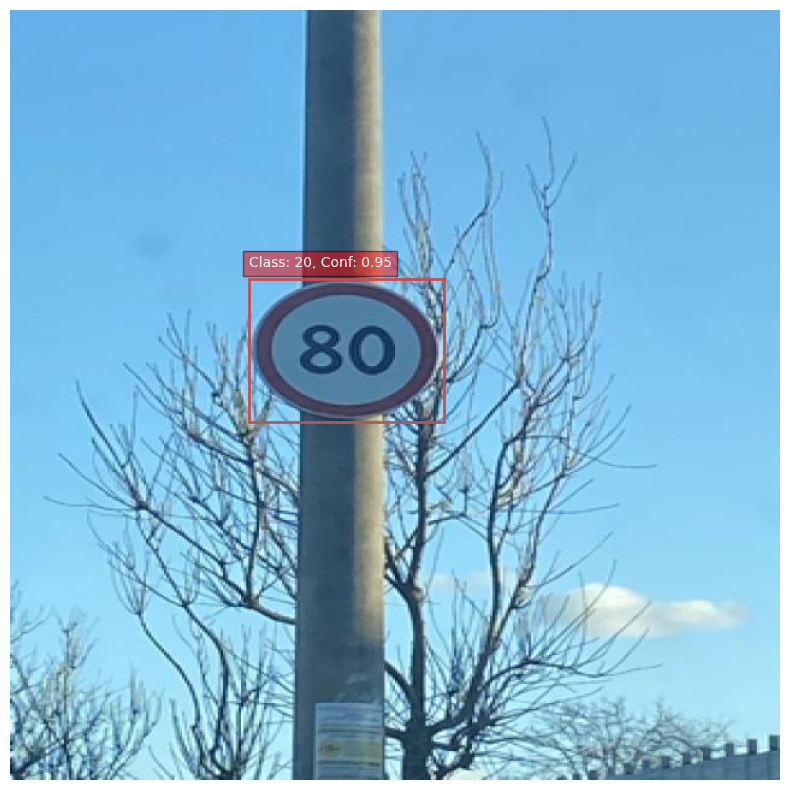


image 1/1 /content/drive/MyDrive/Q3_yolov5/test/00001_00031_00022_png_jpg.rf.9ee3c2db3a9c40ca861834019741e02d.jpg: 640x640 1 Speed limit 30 Kph, 17.1ms
Speed: 2.3ms preprocess, 17.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


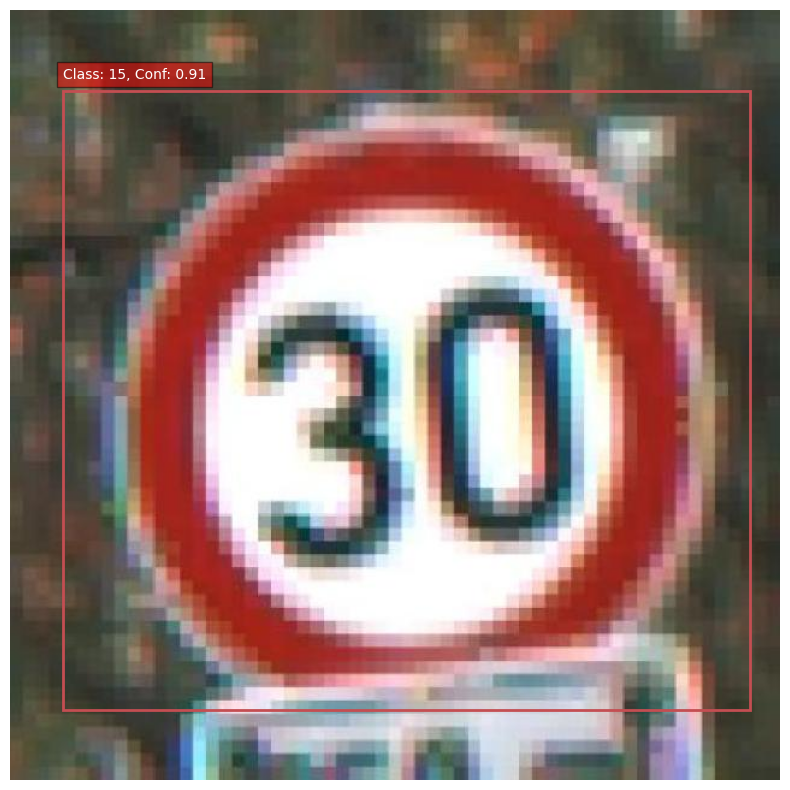


image 1/1 /content/drive/MyDrive/Q3_yolov5/test/road413_png.rf.8107b72aa82733b2f205542a988ffbf8.jpg: 640x640 1 Speed limit 100 Kph, 18.0ms
Speed: 2.4ms preprocess, 18.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


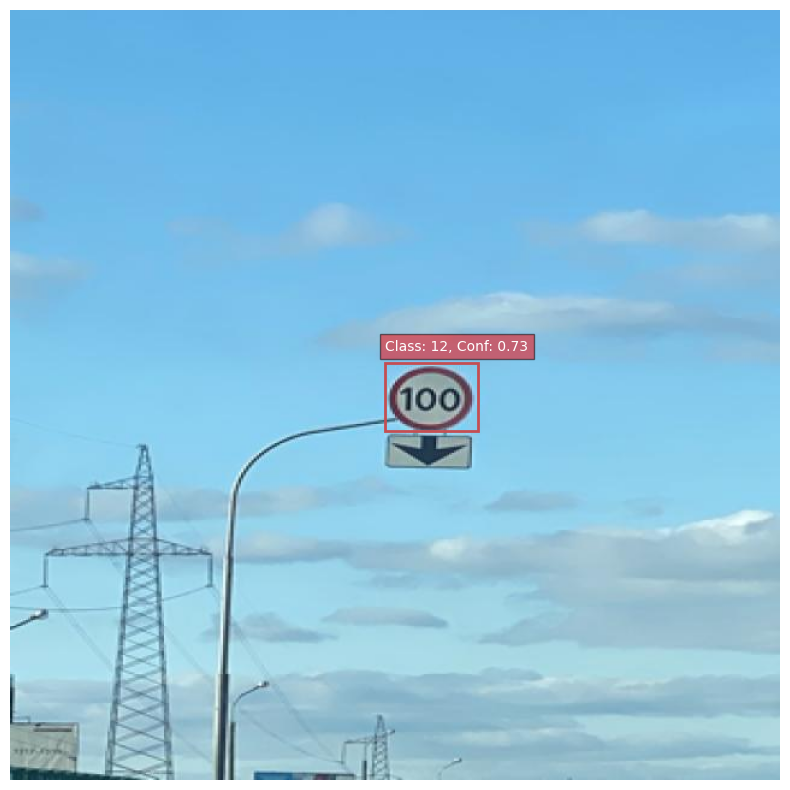


image 1/1 /content/drive/MyDrive/Q3_yolov5/test/00001_00027_00029_png_jpg.rf.04a2accee8e6d3a219f4875c71da527b.jpg: 640x640 1 Speed limit 30 Kph, 19.7ms
Speed: 2.0ms preprocess, 19.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


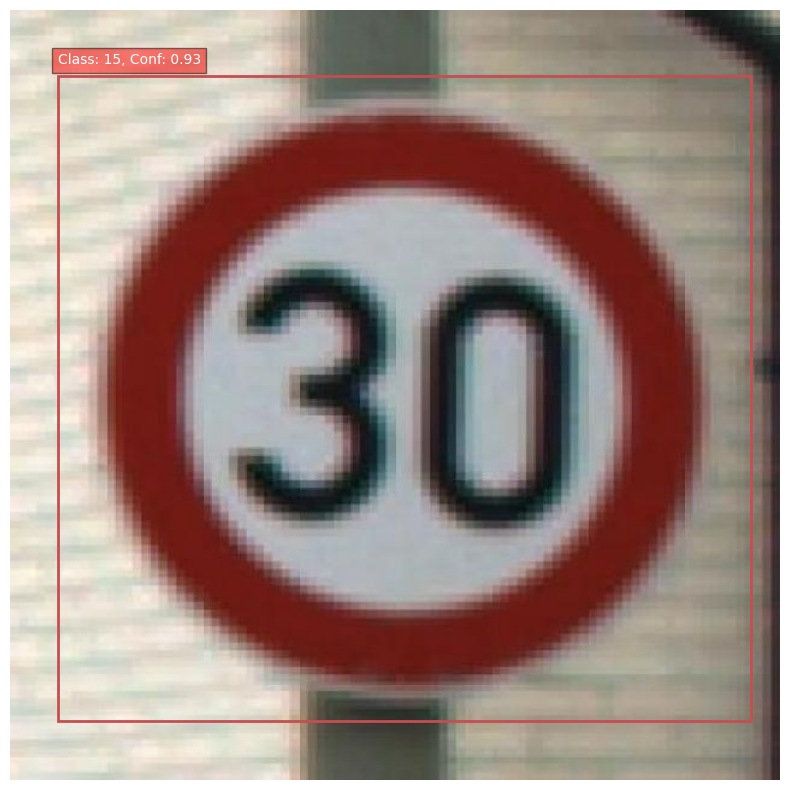


image 1/1 /content/drive/MyDrive/Q3_yolov5/test/00001_00033_00026_png_jpg.rf.93513f78d964ff8bee5b54135ea76900.jpg: 640x640 1 Speed limit 30 Kph, 15.9ms
Speed: 1.9ms preprocess, 15.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


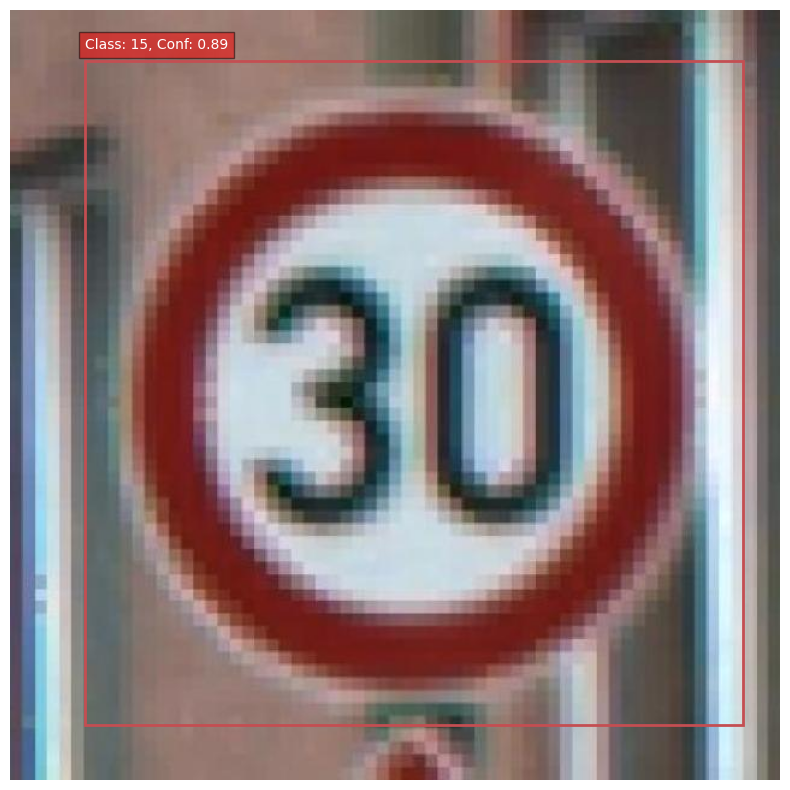

Predicted images saved to: /content/drive/MyDrive/Q3_yolov5/predicted_images


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import random
import os

# Directory to save the predicted images
output_dir = r'/content/drive/MyDrive/Q3_yolov5/predicted_images'
os.makedirs(output_dir, exist_ok=True)  # Create directory if it doesn't exist

# Function to visualize, save, and print image with predicted bounding boxes
def visualize_and_save_predictions(image_path, predictions, save_path):
    # Open the image
    img = Image.open(image_path)
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    ax = plt.gca()

    # Iterating through the predictions and drawing the boxes
    for box in predictions.boxes:
        x1, y1, x2, y2 = box.xyxy[0].tolist() 
        conf = box.conf[0].item()  
        cls = int(box.cls[0].item()) 

        # Rectangle patch for the bounding box
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        # Annotating the bounding box with class and confidence
        plt.text(x1, y1 - 10, f'Class: {cls}, Conf: {conf:.2f}', color='white', bbox=dict(facecolor='red', alpha=0.5))

    plt.axis('off')

    # Saving the visualized image
    plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
    plt.show()

    plt.close() 

# Directory where test images are stored
test_image_dir = r'/content/drive/MyDrive/Q3_yolov5/test'

# Getting a list of all test image filenames
test_image_files = [f for f in os.listdir(test_image_dir) if f.endswith('.jpg')]

# Random test images to visualize, save, and print
num_images_to_visualize = 5
random_image_files = random.sample(test_image_files, num_images_to_visualize)

# Looping through the selected random images, predicting, saving, and printing the visualized images
for image_file in random_image_files:
    image_path = os.path.join(test_image_dir, image_file)
    prediction = model.predict(source=image_path)  
    save_path = os.path.join(output_dir, f"predicted_{image_file}") 
    visualize_and_save_predictions(image_path, prediction[0], save_path)

print(f"Predicted images saved to: {output_dir}")

In [ ]:
import csv
#bounding boxes
output_csv_path = "/content/drive/MyDrive/Q3_yolov5/bounding_boxes.csv"

# CSV file for writing
with open(output_csv_path, mode='w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(['image_id', 'x1', 'y1', 'x2', 'y2', 'class', 'confidence'])

    # Looping over each test image
    for image_file in test_image_files:
        image_path = os.path.join(test_image_dir, image_file)
        predictions = model.predict(source=image_path)

        # Extracting bounding box information for each prediction
        for box in predictions[0].boxes:
            x1, y1, x2, y2 = box.xyxy[0].tolist()  # Bounding box coordinates
            conf = box.conf[0].item()  
            cls = int(box.cls[0].item())

            # Write row to CSV
            writer.writerow([image_file, x1, y1, x2, y2, cls, conf])

print(f"CSV file with bounding box coordinates saved to: {output_csv_path}")


image 1/1 /content/drive/MyDrive/Q3_yolov5/test/00000_00000_00000_png_jpg.rf.fe38518f555b8b4d139ed0a31adee9fc.jpg: 640x640 1 Dangerous Rright Curve Ahead, 2 No Entrys, 17.6ms
Speed: 2.3ms preprocess, 17.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Q3_yolov5/test/00000_00000_00014_png_jpg.rf.da4d304ccb4fd7555f5c291bed572107.jpg: 640x640 1 Dangerous Rright Curve Ahead, 1 No Entry, 14.6ms
Speed: 1.5ms preprocess, 14.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Q3_yolov5/test/00000_00000_00018_png_jpg.rf.4eff8cf87317fad6622f1d00b81d575e.jpg: 640x640 1 Speed limit 20 Kph, 14.3ms
Speed: 1.4ms preprocess, 14.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Q3_yolov5/test/00000_00000_00019_png_jpg.rf.923c0a404dce9e2518dcff1a64cd7e04.jpg: 640x640 1 Speed limit 20 Kph, 15.4ms
Speed: 1.4ms preprocess, 15.4ms inference, 1.3ms pos

In [ ]:
#submission file creation

In [ ]:
import csv
import os
test_image_dir = r'/content/drive/MyDrive/Q3_yolov5/test'

# CSV file for saving predictions
output_csv = r'/content/drive/MyDrive/Q3_yolov5/submission_m4.csv'

# CSV file for writing
with open(output_csv, mode='w', newline='') as file:
    writer = csv.writer(file)

    # Writing the header
    writer.writerow(['filename', 'class'])

    # Looping through all the test images
    for image_name in os.listdir(test_image_dir):
        image_path = os.path.join(test_image_dir, image_name)

        # Predicting bounding boxes
        predictions = model.predict(source=image_path)
        class_names = set()

        # Extracting the predicted classes for the image
        for box in predictions[0].boxes:
            cls = int(box.cls[0].item())

            class_name = model.names[cls] 
            class_names.add(class_name)

        class_names_list = ', '.join(class_names)
        writer.writerow([image_name, class_names_list])

print(f"Predictions saved to {output_csv}")



image 1/1 /content/drive/MyDrive/Q3_yolov5/test/00000_00000_00000_png_jpg.rf.fe38518f555b8b4d139ed0a31adee9fc.jpg: 640x640 (no detections), 17.3ms
Speed: 2.4ms preprocess, 17.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Q3_yolov5/test/00000_00000_00014_png_jpg.rf.da4d304ccb4fd7555f5c291bed572107.jpg: 640x640 1 Speed limit 20 Kph, 15.8ms
Speed: 1.7ms preprocess, 15.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Q3_yolov5/test/00000_00000_00018_png_jpg.rf.4eff8cf87317fad6622f1d00b81d575e.jpg: 640x640 1 Speed limit 20 Kph, 17.1ms
Speed: 1.6ms preprocess, 17.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Q3_yolov5/test/00000_00000_00019_png_jpg.rf.923c0a404dce9e2518dcff1a64cd7e04.jpg: 640x640 1 Speed limit 20 Kph, 18.0ms
Speed: 1.7ms preprocess, 18.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

imag

In [ ]:
#IOU calculation

In [ ]:
import os
from ultralytics import YOLO

# Paths to validation images and labels
val_image_dir = r'/content/drive/MyDrive/Q3_yolov5/valid/images'
val_label_dir = r'/content/drive/MyDrive/Q3_yolov5/valid/labels'

# Converting YOLO format to standard box format
def yolo_to_xyxy(box, img_width, img_height):
    x_center, y_center, width, height = box
    x1 = (x_center - width / 2) * img_width
    y1 = (y_center - height / 2) * img_height
    x2 = (x_center + width / 2) * img_width
    y2 = (y_center + height / 2) * img_height
    return [x1, y1, x2, y2]

# IoU calculation function
def calculate_iou(boxA, boxB):
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    interArea = max(0, xB - xA) * max(0, yB - yA)
    boxAArea = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
    boxBArea = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])

    iou = interArea / float(boxAArea + boxBArea - interArea)
    return iou

# Calculating IoU for each validation image
total_iou = 0
num_boxes = 0

for image_name in os.listdir(val_image_dir):
    image_path = os.path.join(val_image_dir, image_name)
    label_path = os.path.join(val_label_dir, os.path.splitext(image_name)[0] + '.txt')
    img = Image.open(image_path)
    img_width, img_height = img.size

    # Loading ground truth boxes from label file
    ground_truth_boxes = []
    with open(label_path, 'r') as f:
        for line in f:
            class_id, x_center, y_center, width, height = map(float, line.strip().split())
            ground_truth_boxes.append(yolo_to_xyxy([x_center, y_center, width, height], img_width, img_height))

    # Predicting boxes using YOLO
    yolo_predictions = model.predict(source=image_path)[0]

    # Calculating IoU for each prediction
    for pred_box in yolo_predictions.boxes:
        pred_coords = pred_box.xyxy[0].tolist()
        pred_box_coords = [int(pred_coords[0]), int(pred_coords[1]), int(pred_coords[2]), int(pred_coords[3])]

        # Calculating IoU with each ground truth box
        for gt_box in ground_truth_boxes:
            iou = calculate_iou(pred_box_coords, gt_box)
            total_iou += iou
            num_boxes += 1

# Calculating and printing average IoU
average_iou = total_iou / num_boxes if num_boxes > 0 else 0
print(f"Average IoU over validation set: {average_iou:.4f}")



image 1/1 /content/drive/MyDrive/Q3_yolov5/valid/images/00000_00000_00018_png_jpg.rf.f707cbdaf4d44b31e41ee7d604b558de.jpg: 640x640 1 Speed limit 20 Kph, 17.3ms
Speed: 2.4ms preprocess, 17.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Q3_yolov5/valid/images/00000_00000_00019_png_jpg.rf.0caa91836417583be08013d5f095bcdc.jpg: 640x640 1 Speed limit 20 Kph, 14.8ms
Speed: 1.7ms preprocess, 14.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Q3_yolov5/valid/images/00000_00000_00021_png_jpg.rf.76273d6def41e680b11585baf2c5060f.jpg: 640x640 1 Speed limit 20 Kph, 14.6ms
Speed: 1.6ms preprocess, 14.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Q3_yolov5/valid/images/00000_00000_00022_png_jpg.rf.6747813c922976c163aa5f9881eed31b.jpg: 640x640 1 Speed limit 20 Kph, 16.8ms
Speed: 1.7ms preprocess, 16.8ms inference, 1.5ms postprocess per 

In [20]:
print(f"Average IoU over validation set: {average_iou:.4f}")

Average IoU over validation set: 0.5198


In [ ]:
#Saving the model weights

In [ ]:
model.save(r"/content/drive/MyDrive/Q3_yolov5/yolov5_model2_weights.pt")

Visualizing some plots created and stored in results during the model development

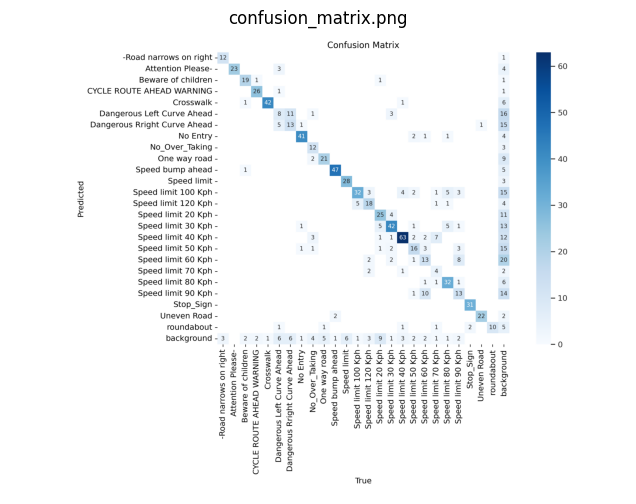

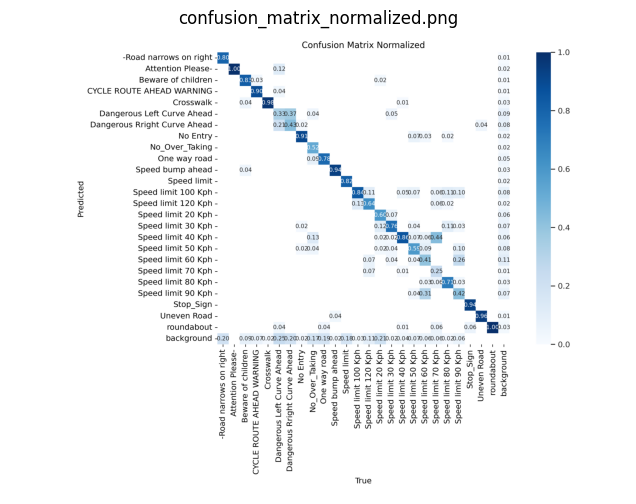

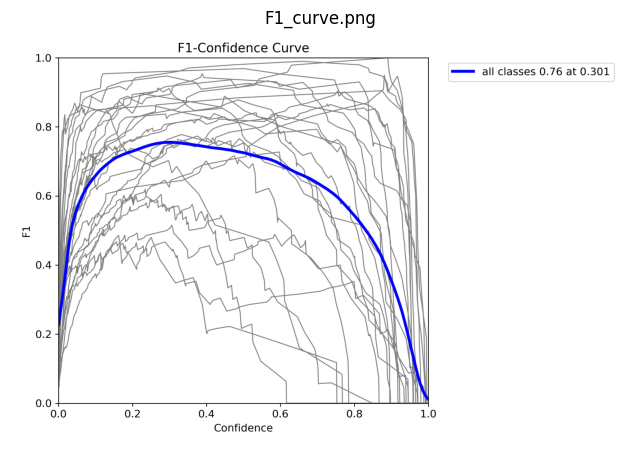

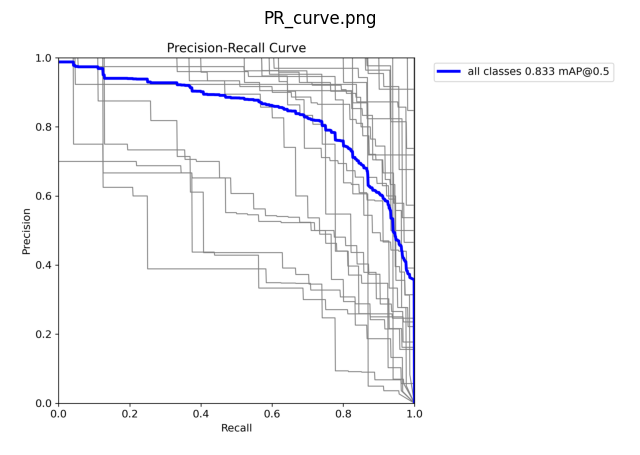

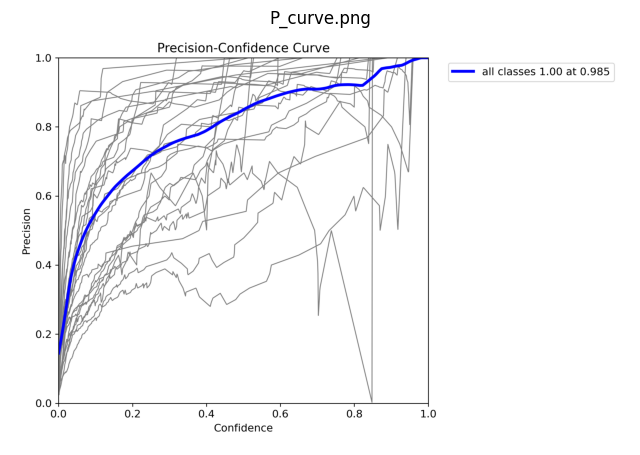

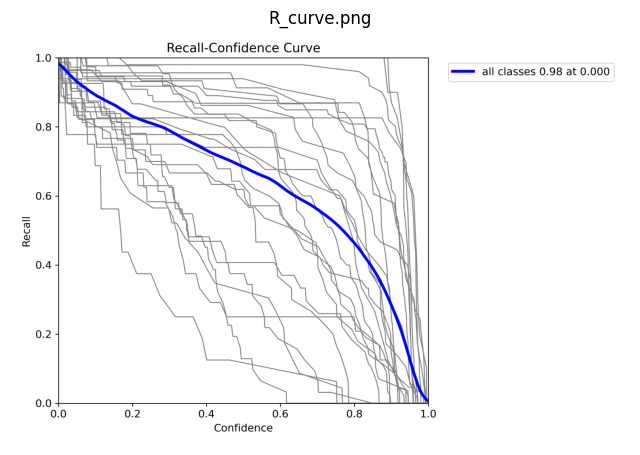

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Specifying the folder containing the graph images
graph_folder = '/app/Lab/Q3/pretrained_other/FINAL/yolov5/graphs'

# Getting all the files
image_files = [f for f in os.listdir(graph_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Looping through each image file and displaying
for image_file in image_files:
    img_path = os.path.join(graph_folder, image_file)
    img = Image.open(img_path)
    
    # Displaying the image with matplotlib
    plt.figure(figsize=(8, 6)) 
    plt.imshow(img)
    plt.axis('off') 
    plt.title(image_file)  
    plt.show()
